In [1]:
import numpy as np

from tools._graphtools import *
from tools._vectools import * 

from scipy.linalg import expm
import tqdm as tqdm
np.set_printoptions(precision=3,suppress=True)


In [2]:
neck = gen_necklace(4)
#neck = (1, 2,3,4,5,6,7,8)

In [3]:
X = [2,2]
AFB = 2*np.pi/X[0]

ftree = generate_ft(X)
ftree.construct_fluxed()
#rand = generate_random_cycle_graph(ftree,neck)
rand = generate_rgc(ftree,neck)

half_rand = generate_half_rgc(ftree,neck)

rand.construct_fluxed()
rand.construct_adj()

half_rand.construct_fluxed()
half_rand.construct_adj()

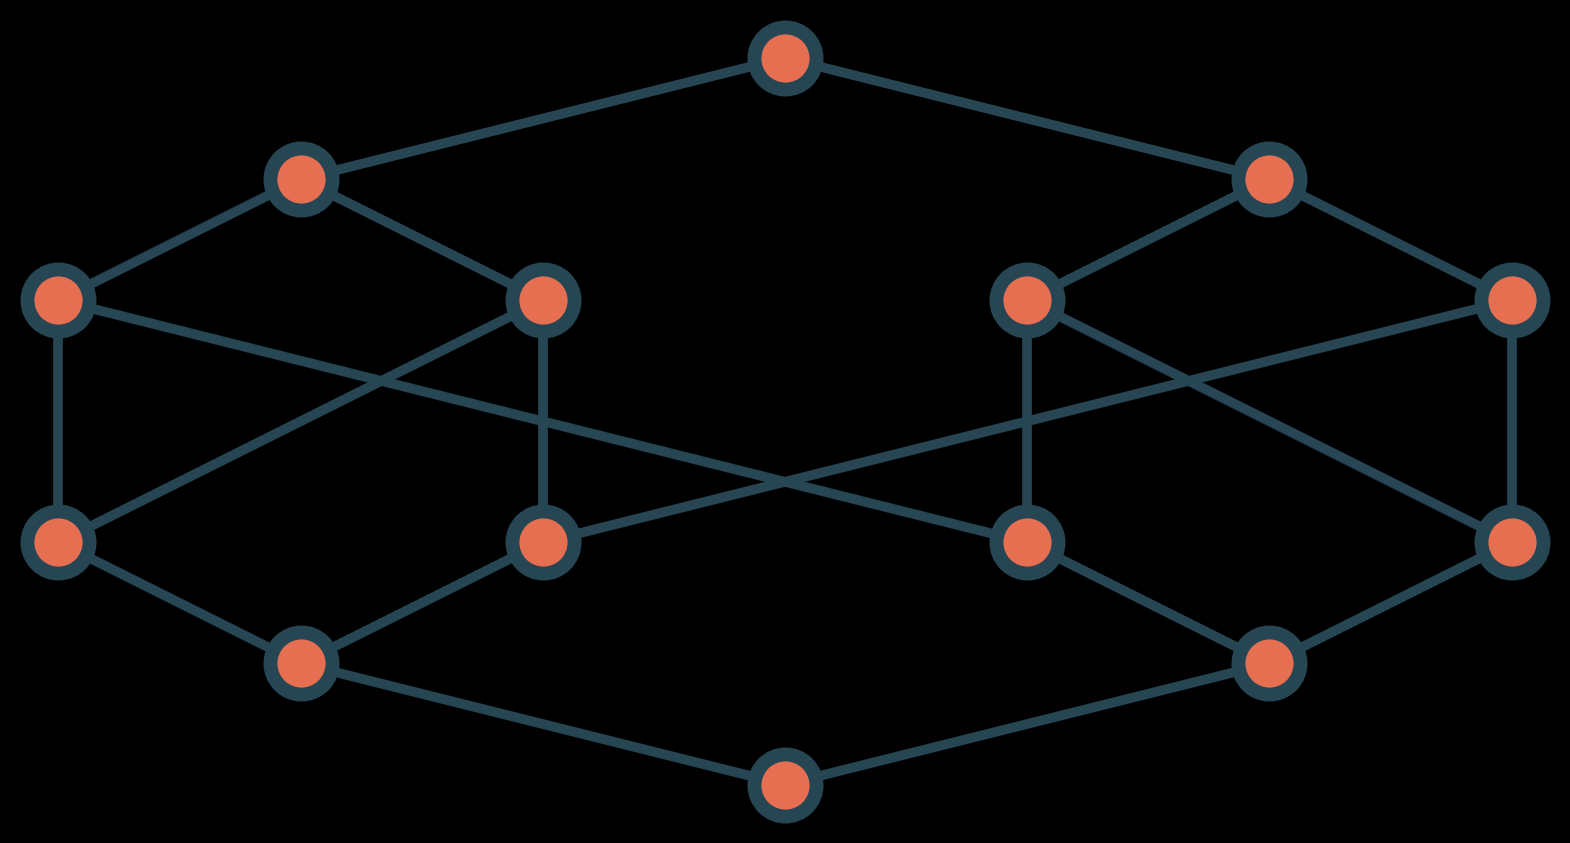

In [4]:
plt.style.use('dark_background')

fig, axes = plt.subplots(1, 1, figsize=(20, 20))  # adjust figsize as needed

#pl_graph(axes, rand, positions=rand_cycle_coords(X,xd=3,yd=1,spacing=1), vertex_size=350,outline_weight = 1, edge_weight=2,margin=.2)
pl_graph(axes, rand, positions=rgc_coords(X,xd=3,yd=1,spacing=1), vertex_size=2000,outline_weight = 10, edge_weight=7,margin=.2)


#plt.show()

plt.savefig("gt.pdf")

In [5]:
np.shape(rand.adj)

(14, 14)

In [6]:
rand.adj[:7,:7]

array([[0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [7]:
rand.adj[7:,7:]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0.]])

In [8]:
# Define the time array over which evolution is evaluated
t = np.linspace(0, 20, 1000)
delta_t = t[1]
U_bare = expm(-1j * rand.weighted_adj(0) * delta_t)
U_half_bare = expm(-1j * rand.weighted_adj(2*np.pi) * delta_t)


N = np.shape(rand.adj)[0]
psi_i = e_n(0, N)
end = e_n(tree_mag(X), N)


prob_bare = [0]
psi_curr_bare = e_n(0, N)

prob_half_bare = [0]
psi_curr_half_bare = e_n(0, N)

# Use tqdm to show progress for each time step
for time in tqdm.tqdm(t[1:], desc=f"Processing time steps", unit="time step"):
    psi_curr_bare = U_bare@psi_curr_bare
    prob_bare.append(np.abs(end.conj() @ psi_curr_bare)**2)

    psi_curr_half_bare = U_half_bare@psi_curr_half_bare
    prob_half_bare.append(np.abs(end.conj() @ psi_curr_half_bare)**2)

Processing time steps: 100%|██████████| 999/999 [00:00<00:00, 155517.56time step/s]


Text(0.5, 1.0, '(1, 4, 5, 2, 7, 6, 3, 8)')

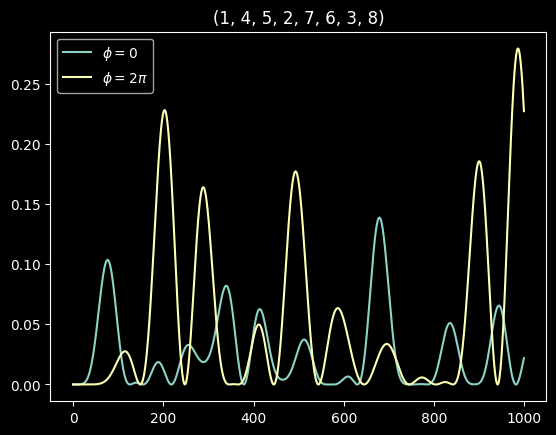

In [9]:
plt.plot(prob_bare,label=r"$\phi=0$")
plt.plot(prob_half_bare,label=r"$\phi=2\pi$")
plt.legend()

plt.title(neck)

In [10]:
def limit(eigvecs, a,b):
    total = 0
    for i in range(0,len(a)):
        vec = eigvecs[:,i]
        total += np.abs(a.conj() @ vec * b.conj() @ vec)**2
    return total

_, eigvecs = np.linalg.eigh(U_half_bare)
limit(eigvecs, psi_i,end)            


np.float64(0.04810236707660149)

In [11]:
_, eigvecs = np.linalg.eigh(U_bare)
limit(eigvecs, psi_i,end)            


np.float64(0.027022391723001103)

Processing time steps: 100%|██████████| 999/999 [00:00<00:00, 82412.72time step/s]


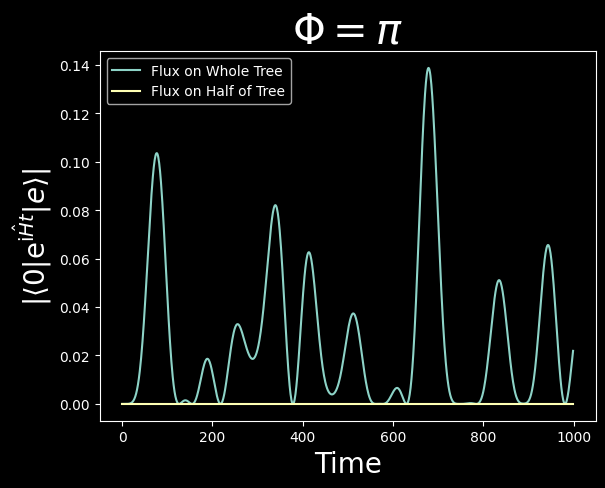

In [16]:
# Define the time array over which evolution is evaluated
t = np.linspace(0, 20, 1000)
delta_t = t[1]
U_bare = expm(-1j * rand.weighted_adj(0) * delta_t)
U_half_bare = expm(-1j * half_rand.weighted_adj(2*np.pi) * delta_t)


N = np.shape(rand.adj)[0]
psi_i = e_n(0, N)
end = e_n(tree_mag(X), N)


prob_bare = [0]
psi_curr_bare = e_n(0, N)

prob_half_bare = [0]
psi_curr_half_bare = e_n(0, N)

# Use tqdm to show progress for each time step
for time in tqdm.tqdm(t[1:], desc=f"Processing time steps", unit="time step"):
    psi_curr_bare = U_bare@psi_curr_bare
    prob_bare.append(np.abs(end.conj() @ psi_curr_bare)**2)

    psi_curr_half_bare = U_half_bare@psi_curr_half_bare
    prob_half_bare.append(np.abs(end.conj() @ psi_curr_half_bare)**2)


fs = 20
plt.plot(prob_bare,label="Flux on Whole Tree")
plt.plot(prob_half_bare,label="Flux on Half of Tree")
plt.ylabel(r"$|\langle 0 |\mathrm{e}^{\mathrm{i} \hat{H}t} | e \rangle|$",fontsize=fs)
plt.xlabel("Time",fontsize=fs)
plt.title(r"$\Phi = \pi $",fontsize=30)

plt.legend()

In [81]:
data =np.load("limitresults/82308003_10000_lim_check.npz",allow_pickle=True)

In [82]:
data['bad_neck']

array(set(), dtype=object)

In [21]:
a =[1,2,3]

In [23]:
a[:-1]

[1, 2]

In [24]:
n=3
np.fliplr(np.eye(n))    

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [19]:
N = 5


np.outer(e_n(0,N), e_n(1,N)) +np.outer(e_n(0,N), e_n(3,N))

array([[0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [1]:
from tools._counttools import *

In [4]:
enumerate_necklaces(2)

{(1, 2, 3, 4)}